# Определение успешности игры

## Описание данных и задачи

### Задача
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

### План проекта
* Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет
* Шаг 2. Подготовьте данные
 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили
тип данных и почему;
 - Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или
почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой
пользователей. Отдельно разберите это значение и опишите, как его
обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.
* Шаг 3. Проведите исследовательский анализ данных
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам.
 - За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?
* Шаг 4. Составьте портрет пользователя каждого региона
 - Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Шаг 5. Проверьте гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.
 - Задайте самостоятельно пороговое значение alpha.
 - Поясните:
  - Как вы сформулировали нулевую и альтернативную гипотезы;
  - Какой критерий применили для проверки гипотез и почему.
* Шаг 6. Напишите общий вывод

## Получение информации и ее изучение

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy.stats import ttest_ind
%matplotlib inline

### Выгрузка данных

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Изучение инофрмации

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас есть пропуски в название игр, но их всего 2. Много пропуска в оценке критиков, так же есть пропуски в оценке пользователей.<br></br>
Строки где пропущены оценки и тех и других, предположительно являются новыми играми. Нужно будет проверить.<br></br>
По тей же причине могут быть и пропуски в рейтинге.<br></br>
Нужно заменить название столбец на единый реестр.<br></br>
А так же изменить типы столбцов.

In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод
В целом в данных на первый взгляд нечего не обычного, более подброный анализ при обработке покажет более полную картину.

## Обработка данных

### Изменим название столбцев

In [6]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
games.columns = [x.lower() for x in games.columns] #Переберем все название столбцев и применим к ним методов lower

In [8]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь все название в едином стиле.

### Изменение типов столбцов и обработка пропусков

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Столбец год релиза

In [10]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

В столбце с датой есть пропущенные значения, они не дадут нам привести к нужному типу данных

Такие столбцы могли появится просто потому что не указали дату выходу при сборе данных, т.к. выяснить эту информацию возможности нет.


По этому поступим нестандарно, переведем слово "Неизвестно" в число следующим образом:
- Каждой букве присвоим номер соотвествующий ее порядковому номеру в алфавите
- Сложим все эти значения


В итоге получаем число 119, на него и заменими пропущенные значения

In [11]:
games['year_of_release'] = games['year_of_release'].fillna(119)

In [12]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,  119., 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
games['year_of_release'] = games['year_of_release'].astype('int64')

Теперь разберемся с оценкой пользователей

#### Столбец оценка пользователей

In [14]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть не понятное значение "tbd" с помощью гугл выяснили что это означает "Будет определено".   
Следовательно можем заменить и nan и tbd на "-1", если заменим на 0 то это будет означать что игра пользователям не понравилась совсем.

In [15]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].fillna(-1)

In [16]:
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [17]:
games['user_score'] = games['user_score'].astype('float64')

In [18]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Столбец оценка критиков

Поступим с ним аналогично оценке пользователей

In [19]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
games['critic_score'] = games['critic_score'].fillna(-1)

In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Столбец рейтинг 

In [22]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
games[games['rating'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,NaN


В данному случаем заменим пропуски на "Unrated", т.к. игры с пропущенным значениям скорее всего не отправляли на проверку рейтинга.

In [24]:
games['rating'] = games['rating'].fillna('Unrated')
games['rating'] = np.where((games.rating == 'K-A'), 'E', games.rating)

In [25]:
games['rating'].unique()

array(['E', 'Unrated', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Столбцы название и жанр

In [27]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,Unrated
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,Unrated


In [28]:
games[games['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,Unrated
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,Unrated


Строки с пропуском индентичные, в них пропущено много значений, одна из них так вообще продалась 30000 копиями исключительно в японии. 

На релеватность данных их удаление не повиляет, так-что избавимся от них

In [29]:
games = games.dropna()

In [30]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Подсчет суммарных продаж по всем регионам

In [31]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [32]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unrated,31.38


### Вывод
- Были удалены 2 неизвестные игры
- Столбцы с годом и рейтингами привели к нужным типам
- Подсчитали суммарные продажи

В целом данным собраны хороши, однако отсутсвие значений в рейтинги, говорит о том, что есть ошибка в алгоритме сбора данных, т.к. игры подлежат обязательному возростному рейтингу.

С оценками их скорее всего могли просто неставить, те или иные группы.

## Анализ данных

### Функция для построение диаграмм

In [33]:
def create_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
        plt.legend()
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='barh', y=y, figsize=figsize, ec='black')
        plt.legend()

### Сколько игры выпускалась в разные годы?

In [34]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unrated,31.38


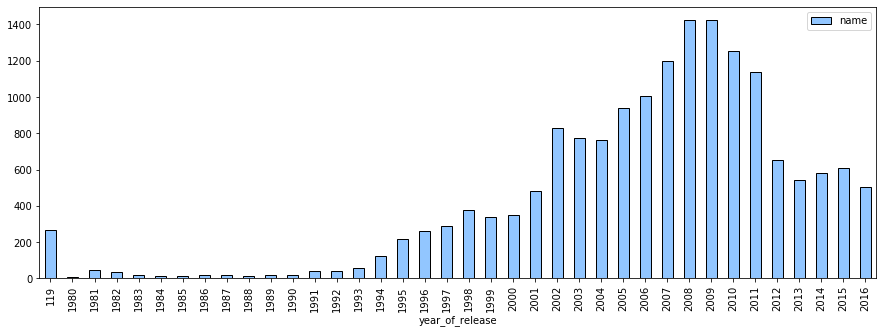

In [35]:
create_bar('year_of_release', 'count')
plt.show()

До 1994 года и Pentium 1 игр практически не было. Потом они начали появляться, сначала на MS-DOS, потом уже на Windows. Резкий скачок по количеству игр, выпущенных в год, произошел в 2002 году. Пик - 2008-2009 года. После этого начался спад, связанный с развитием мобильных устройств, интеграция соц. сетей в жизнь людей. Это всё привело к тому, что интерес к самим играм упал, соответственно, упало и их производство.

### Продажи по платформам

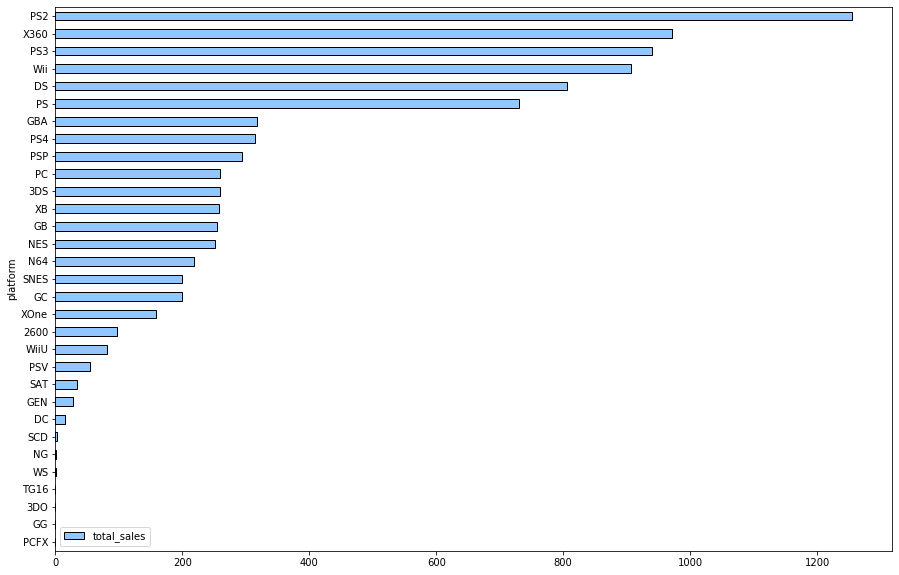

In [36]:
create_bar('platform', 'sum', 'total_sales')
plt.show()

Больше всего продаж приходится на PlayStation 2. Это логично, ведь эта самая популярная консоль и самая продоваемая консоль, с наибольшим периодом выпуска консоли. По этому и игр на нее было на много больше чем на другие консоли. Следом идут XBox360 и PS3. Они попали на период спада игровой индустрии. Аутсайдеры различные японские консоли.

###  Появление и исчезновение новых и страхы платформ

In [37]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [38]:
games_query = games[games['year_of_release'] != 119]

In [39]:
def create_any_lines(platforms=None, query=None):
   # %matplotlib notebook
    plt.style.use('tableau-colorblind10') 
    
    ax = plt.gca()
    legend_list = []
    if query == None:
        if platforms == None:
            bbox_y = 1.08
            legend_size = 7
            platforms = games_query['platform'].unique().tolist()
        else:
            platforms = platforms
            bbox_y = 0.97
            legend_size = 9
    else:
        platforms = games.query(query)['platform'].unique().tolist()
        bbox_y = 0.97
        legend_size = 9
        
    for platform in platforms:
        if query == None:
            df_to_plot = games_query.query('platform == @platform')
        else:
            df_to_plot = games_query.query('platform == @platform').query(query)
        lines = df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                    style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(15,5))
        legend_list.append(platform)
    
    ax.set_xlabel('')
   
    ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

    

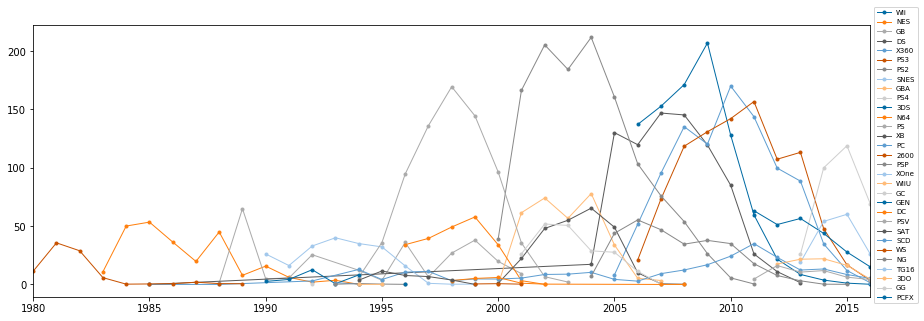

In [40]:
create_any_lines()

Для определение жизни платформ, выберем топ платформ и посмотрим среднюю продолжительность жизни по ним

In [41]:
games.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [42]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS']

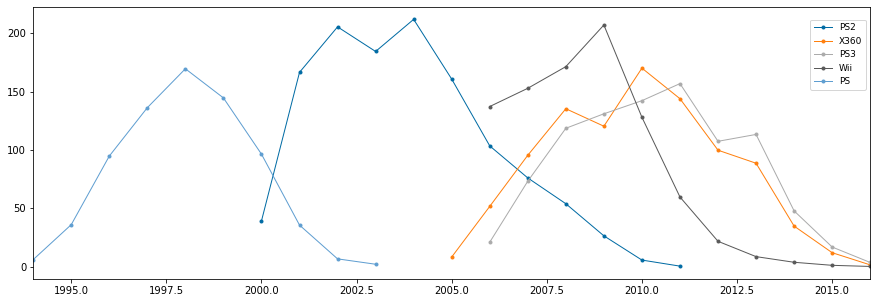

In [43]:
create_any_lines(platforms=top_platforms)

Посмотрим, сколько "живут" консоли.

- PS - прожила с 1994 года до 2003, почти 10 лет;
- PS2 - с 2000 до 2011 года - 11 лет;
- PS3 - с 2006 по настоящее время ещё живёт, но начала сильно сдавать позиции с выходом в 2013 году PS4;
- DS - вышла в 1985, потом вообще нет данных, скорее всего, по той причине, что они не собирались. И с 2004 года популярность стала расти, пик в 2008, конец срока службы - 2013 год - 8 активных лет жизни;
- Wii - с 2006 по нынешний день, но в 2016 уже почти изжила себя - опять 10 лет.

Таким образом, в среднем консоль живет 10 лет. И жила бы больше, если б не выходили более новые консоли. Но это неизбежно, т.к. прогресс идет вперед и "железо" в старых консолях перестает отвечать техническим требованиям новых игр.

### Динамика продаж игр в наше время.

Нам необходимо выбрать актуальный период - период, за который мы будем оценивать наши данные, на основании выводов по которым будем строить предсказательные модели на 2017 год.

На мой взгляд, актуальным периодомявляется период с 2008 по 2016 год:

* это год, когда вышли или вот-вот выйдут все популярные консоли;
* в этом периоде представлены данные по абсолютно всем самым популярным консолям.

Предыдущие года отбросим.

Построим ещё один график, отображающий динамику продаж по уже актуальным годам и ответим на вопрос:
Какие платформы лидируют по продажам, растут или падают?

На основании полученных данных выберем несколько потенциально прибыльных платформ.

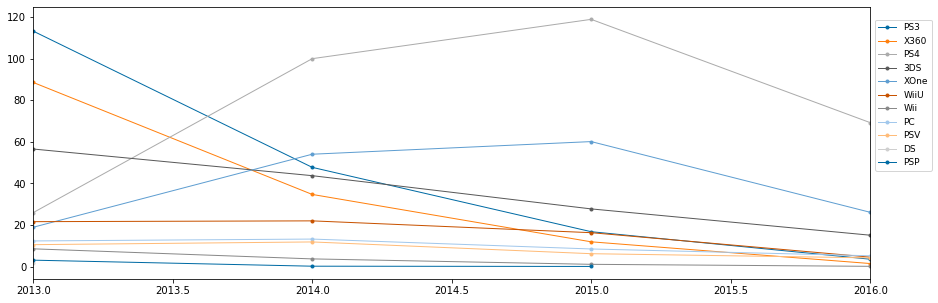

In [44]:
games_query = create_any_lines(query='year_of_release >= 2013')

На конец 2016 года лидируют по продажам следующие платформы:

* PS4;
* XBox One;
* 3DS.

Это топ-3. Причем, исходя из данных, количество продаж игр, выпущенных на каждую из этих платформ, снижается. Таким образом, можно сказать, что весь рынок игр падает.

### Boxplot по глобальным продажам игр и с разбивкой по платформам.

In [45]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [46]:
games_2012 = (games[games['year_of_release'] >= 2012])

In [47]:
def create_any_sales_boxplot(title=None, query_condition = None, ylims=None):
    %matplotlib inline
    if query_condition == None:
        ax = games_2012.boxplot(column='total_sales', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5), 
                                         notch=True)
    else:
        df_query = games_2012.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5),
                                         notch=True)
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

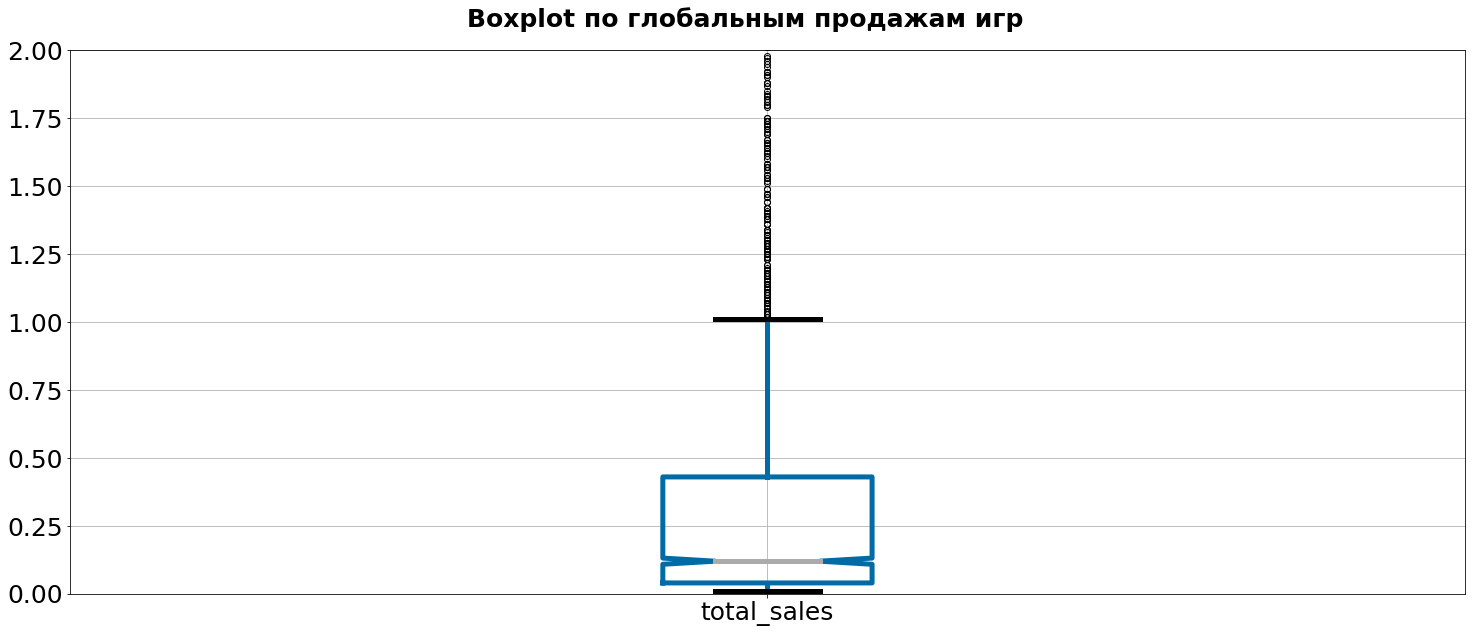

In [48]:
create_any_sales_boxplot('Boxplot по глобальным продажам игр', ylims =[0,2])

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


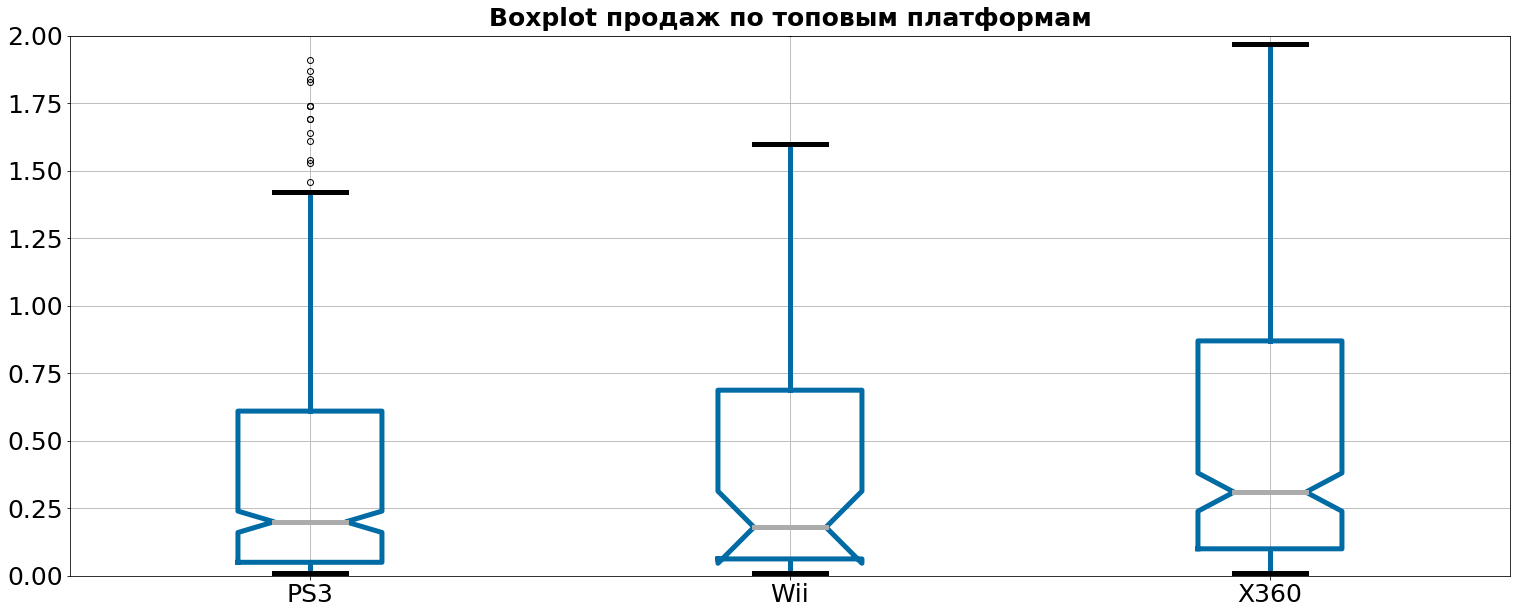

In [49]:
create_any_sales_boxplot('Boxplot продаж по топовым платформам', query_condition="platform in @top_platforms", ylims=[0,2])

Медиана по топовым платформам варьируется от 0,2 до 0.3 млн долларов прибыли за игру.

Верхняя граница предела, за которыми уже определяются аномалии, у PS3 на уровне 1,4 млн долларов.

У остальных аномалии не наблюдаются.

### Влияние отзывов пользователей и критиков на продажи.

In [50]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()

Для анализа возьмем самую популярную платформу PS3

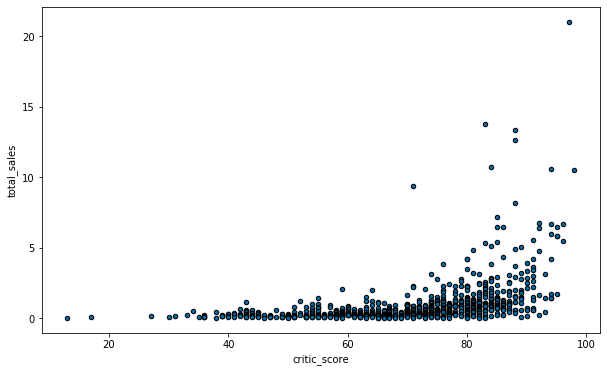

In [51]:
matplotlib_axes_logger.setLevel('ERROR')

games_ps3 = games[(games['platform'] == 'PS3') & (games['critic_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))

С увеличением среднего рейтинга критиков увеличивается и средний уровень выручки с продажи игр, что логично: чем качественнее игра, тем больше денег она приносит разработчику и издателю.

Теперь от отзывов пользователей:

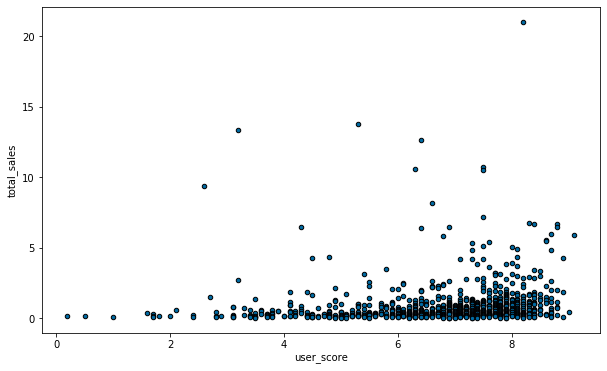

In [52]:
games_ps3 = games[(games['platform'] == 'PS3') & (games['user_score'] > 0)].copy()
games_ps3.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))

Точно такая же картина, правда так называемых выбросов больше - когда рейтинг пользователей не велик, но тем не менее игра собирает большие деньги. В пример могу привести те же последние игры серии Need for Speed, когда все покупают игру, принося разработчикам прибыль, а потом расстраиваются, увидев, какая эта игра, и ставят ей довольное средние оценки.

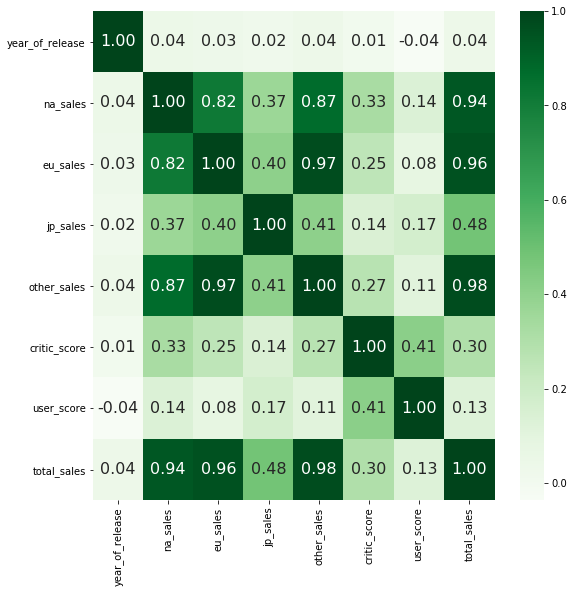

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(games_ps3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

Выделим необходимые данные:

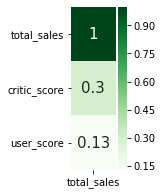

In [54]:
games_ps3_filtered = games_ps3[['total_sales' ,'critic_score', 'user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(games_ps3_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':15})

Сильнее всего на конечную стоимость влияет оценка критиков. Сильнее меньше, практически не влияет - оценка пользователей.

Посмотрим на корреляцию по платформам

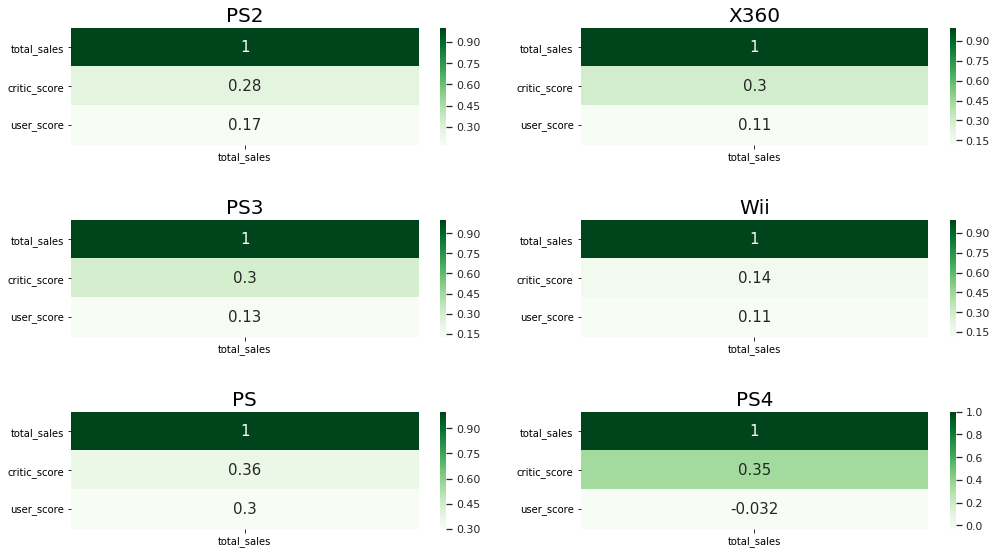

In [55]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'PS', 'PS4', 'XOne']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Greens", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

Данные по корреляции между выручкой и оценкой по платформам PS2, X360, PS3, PS и XOne более или менее совпадает с общими данными по датафрейму.

Выделяются Wii, по которой зависимость не такая большая.

Кстати, есть платформы, где оценка критиков, согласно данных, сильнее "определяет" конечную выручку продукта, чем оценка пользователей. Это платформы PS4 и Xone. 

Про PS4 и Xone - платформы довольно новые, вполне вероятно, что пользователи пока не "освоились", поэтому большого количества отзывов, особенно качественных от них нет.

### Распределение игр по жанрам

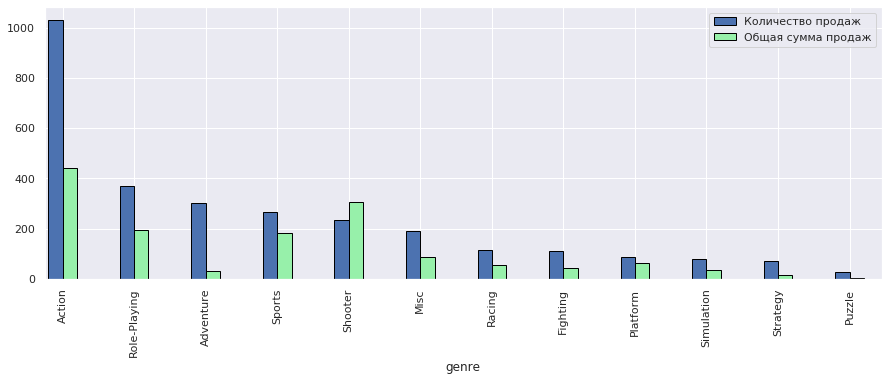

In [56]:
ax = plt.gca()

pivot = games_2012.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

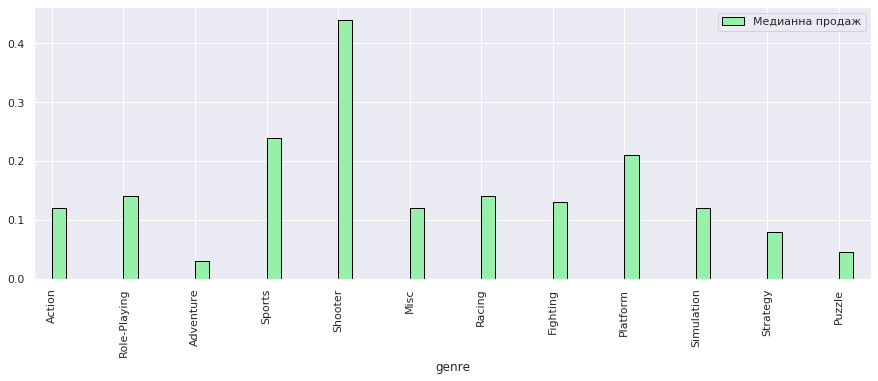

In [57]:
ax = plt.gca()

pivot = games_2012.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='name', ascending=False)

#plot1 = pivot['name']
#plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='#97F0AA', position=0)

ax.legend(['Медианна продаж'])

Больше всего игр жанра *action* и *sports* У них же и самые большие выручки. Однако выручка от продаж у них почти одинаковая, а это значит что игры жанра спорт стоят в среднем дороже, чем шутеры.

Количество проданных копий:

* Action
* Спортивный жанр
* Игры "смешанного" жанра - Miscellaneous


Сумма выручки:

* Action
* Спортивный жанр
* Шутеры

## Составьте портрет пользователя каждого региона

### Портрет пользователя регионов NA, EU, JP

Определим для пользователя каждого региона (NA, EU, JP):

* самые популярные платформы (топ-5), опишем различия в долях продаж;
* самые популярные жанры (топ-5), поясним разницу;
* определим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [58]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Определим самые популярные платформы по регионам

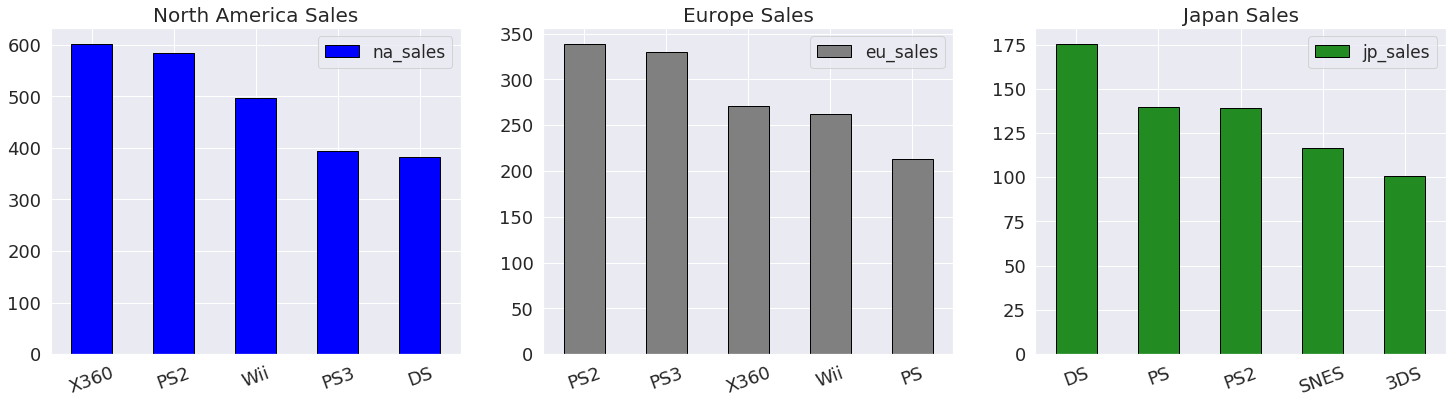

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

В Северной Америке имеют(имели) бешеную популярность приставки прошлого поколения X360 и PS2. Немного отстает Wii. Топ-4 и топ-5 - PS3 и DS соответственно.

В Европе одинаково (были) популярны PS2 и PS3. За ними X360, Wii и PS.

В Японии, как обычно, всё наоборот. Лидер - DS. За ними американские PS и PS2. Далее чисто японские SNES и 3DS.

Определим популярные жанры в регионах

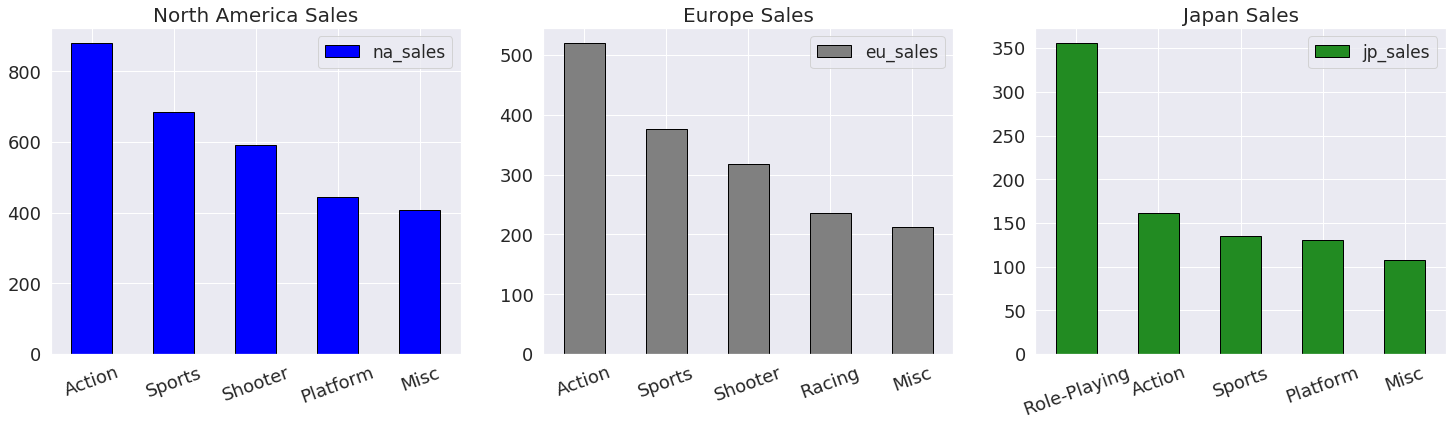

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вкусы в Северной Америке и Европе схожи: и там, и там живут фанаты экшнов, спортивных игр и шутеров. В Северной Америке больше играют в платформеры, в Европе же чаще выбирают гонки.


В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и спортивные игры.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [61]:
#games['ESRB_description'] = games[games['rating'] != 'Unrated']['rating']

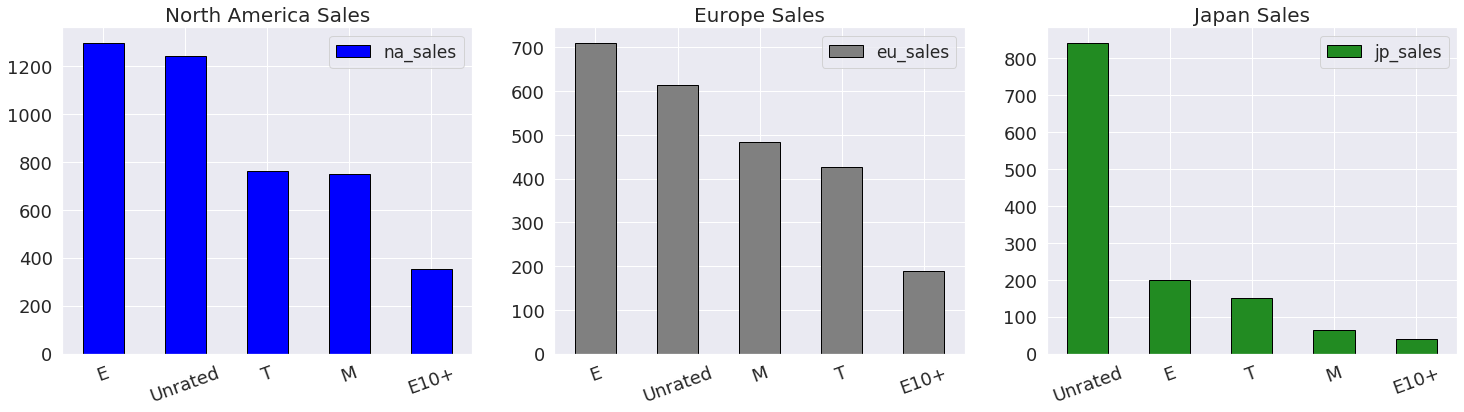

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('rating', 'na_sales', 0)
top_in_regions_plot('rating', 'eu_sales', 1)
top_in_regions_plot('rating', 'jp_sales', 2)

В во всех странах больше всего играют в игры с рейтингом для всех.

- В *Северной америке* в игры с жанром для подростов и взрослых играют одинаковое кол-во людей
- В *Европе* почти так же как и в америке за исключением, что в игры для взрослых играют чуть больше людей
- В *Японии* кол-во играющих с рейтингом для подростков сильно превосходит кол-во с рейтингом для взрослых

Скорее всего в Японии больше людей начинают играть с подросткового возраста. Либо там в отличие от других стран соблюдают рейтинг игр.

## Проверка гипотез

Гипотезы:

* средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки обеих гипотез будем использовать **t-критерий Стьюдента**, т.к. в обоих случаях выборки независимы между собой.
Определим пороговое значение **alpha = 0.05**

### Первая гипотеза

средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [63]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unrated,31.38


In [64]:
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05


Смело отклоняем нулевую гипотезу.<br>
Верно следующее утверждение: **средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.**

Посмотрим в чью пользу:

In [65]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(xbox_one_ratings.mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(pc_ratings.mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.52
Средняя оценка пользователей игр для платформы PC - 7.06


Компьютерные игры получают оценки статистически значимо выше, чем игры для Xbox One. 

### Вторая гипотеза

средние пользовательские рейтинги жанров Action и Sports разные.


Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [66]:
action_ratings = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
pc_ratings = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.6259419280500857
p-value = 0.1041

Пороговое значение alpha = 0.05


Не можем отвергнуть нулевую гипотезу.<br>
Таким образом, остается верным утверждение, что средние пользовательские рейтинги жанров Action и Sports близки.

## Общий вывод

- Самое сильное влияние на итоговую выручку оказывают, в большинстве случаев, оценки критиков. Оценки пользователей таким "влиянием" на выручку похвастаться не могут. 

- В целом про положение дел в игровой индустрии: рынок "немобильных" игр постепенно погибает. Все сейчас в погоне за графикой, новыми технологями, в связи с этим средний бюджет на разработку одной игры за последние годы заметно вырос. Более того, сейчас игрок не так ценит идею и глубины игры, большинство может обрадовать только хорошая картинка и оптимизация - а играть им понравится только в том случае, если в игре будут стрелочки куда идти. Иначе это слишком трудно.

- В итоге, гиганты игровой индустрии гоняются за технологиями, а более мелкие компании, не имеющие таких бюджетов, вынуждены отступать, т.к. единственный их козырь - способность создать глубокую игру с атмосферной - нынче не ценится.
- Всё это привело к тому, что рынок уже который год падает. И, скорее всего, будет падать, потому что тенденции к изменению ценностей на те, которые были всего с десяток лет назад, нет.

### Рекомендации:

* всязи со спадом продаж на всех платформах обратить наибольшее внимание на мобильные игры
* если есть возможность вложиться в разработку игр обратить внимание на платформеры шутеры и гонки как приносяшие максимальные продажи на еденицу продукции